In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [10]:
dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],['Sunglasses', 'Skirt', 'Sneakers', 'Pants','Hat'],['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels','Hat'],['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

In [11]:
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)
df=pd.DataFrame(te_ary, columns=te.columns_)

In [12]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [13]:
frequent_itemsets=apriori(df,min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [14]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


In [15]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6


According to above table, the customers who bought (Skirt) is expected to buy (Pants) with a likelihood of 100% (confidence). Lift & conviction scores are also support that hypothesis
It would be better to put them close to increase sales !

In [11]:
new_df=pd.read_csv("C:\\Users\\Cmejri\\Downloads\\Market_Basket_Optimisation.csv", header=None)

In [12]:
new_df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
new_df.shape

(7501, 20)

In [14]:
new_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,magazines,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


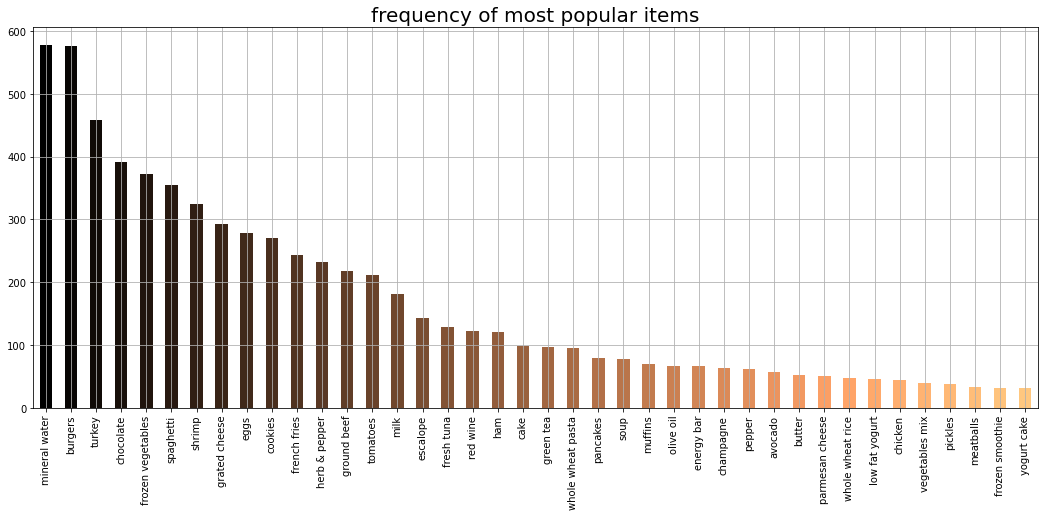

In [18]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
new_df[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [19]:
trans = []
for i in range(0, 7501):
    trans.append([str(new_df.values[i,j]) for j in range(0, 20)])

trans = np.array(trans)

print(trans.shape)

(7501, 20)


In [20]:
new_df = te.fit_transform(trans)
new_df = pd.DataFrame(new_df, columns = te.columns_)

In [21]:
new_df.shape

(7501, 121)

In [22]:
 new_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [23]:
apriori(new_df, min_support = 0.01, use_colnames = True)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
510,0.011065,"(mineral water, milk, ground beef, nan)"
511,0.017064,"(mineral water, spaghetti, ground beef, nan)"
512,0.015731,"(mineral water, milk, spaghetti, nan)"
513,0.010265,"(olive oil, mineral water, spaghetti, nan)"


In [26]:
frequent_itemsets = apriori(new_df, min_support = 0.05, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [32]:
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(nan),0.020397,0.999867,0.020264,0.993464,0.993597,-0.000131,0.020397
1,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
2,(avocado),(nan),0.033329,0.999867,0.033196,0.996000,0.996133,-0.000129,0.033329
3,(barbecue sauce),(nan),0.010799,0.999867,0.010799,1.000000,1.000133,0.000001,inf
4,(black tea),(nan),0.014265,0.999867,0.014265,1.000000,1.000133,0.000002,inf
...,...,...,...,...,...,...,...,...,...
1546,"(pancakes, nan)","(mineral water, spaghetti)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244
1547,"(mineral water, spaghetti)","(pancakes, nan)",0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933
1548,"(spaghetti, nan)","(pancakes, mineral water)",0.174110,0.033729,0.011465,0.065850,1.952333,0.005593,1.034385
1549,(pancakes),"(mineral water, spaghetti, nan)",0.095054,0.059725,0.011465,0.120617,2.019529,0.005788,1.069244


In [29]:
frequent_itemsets = apriori(new_df, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.020397,(almonds),1
1,0.033329,(avocado),1
2,0.010799,(barbecue sauce),1
3,0.014265,(black tea),1
4,0.011465,(body spray),1
...,...,...,...
510,0.011065,"(mineral water, milk, ground beef, nan)",4
511,0.017064,"(mineral water, spaghetti, ground beef, nan)",4
512,0.015731,"(mineral water, milk, spaghetti, nan)",4
513,0.010265,"(olive oil, mineral water, spaghetti, nan)",4


In [30]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length
316,0.011465,"(avocado, mineral water, nan)",3
317,0.011465,"(burgers, nan, cake)",3
318,0.017064,"(chocolate, burgers, nan)",3
319,0.028796,"(eggs, burgers, nan)",3
320,0.021997,"(french fries, burgers, nan)",3


In [33]:
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
282,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.33286,1,1
1089,"(herb & pepper, nan)",(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.33286,2,1
1091,(herb & pepper),"(ground beef, nan)",0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.33286,1,2
283,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.13541,1,1
1092,(ground beef),"(herb & pepper, nan)",0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.13541,1,2
...,...,...,...,...,...,...,...,...,...,...,...
727,(eggs),"(cookies, nan)",0.179709,0.080389,0.010532,0.058605,0.729019,-0.003915,0.97686,1,2
728,(cookies),"(eggs, nan)",0.080389,0.179709,0.010532,0.131012,0.729019,-0.003915,0.94396,1,2
725,"(eggs, nan)",(cookies),0.179709,0.080389,0.010532,0.058605,0.729019,-0.003915,0.97686,2,1
726,"(cookies, nan)",(eggs),0.080389,0.179709,0.010532,0.131012,0.729019,-0.003915,0.94396,2,1


According to above table, we can easily say that the dependency between (herb & pepper) and (ground beef) is high 